# Import Important Packages

In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import os, random

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


# Check GPU Available

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-509cf0ce-8a5d-aa4a-fa20-6093938c3e7e)


# Exploratory Data Analyst

Dataset ini diekspor melalui [universe.roboflow.com](https://universe.roboflow.com/palm-fruit-classification/palm-fruit-ripeness-classificationcnn) pada 23 September 2023 pukul 04.36 GMT

Kumpulan data mencakup 3024 gambar.
Buah sawit dalam format klip.

Pra-pemrosesan berikut diterapkan pada setiap gambar:
* Orientasi otomatis data piksel (dengan stripping orientasi EXIF)
* Ubah ukuran menjadi 299x299 (Peregangan)

In [3]:
train_path = "G:/My Drive/Paddy Dataset/train_images"
images_path = glob(train_path + "/*/*.jp*g")
classname = os.listdir(train_path)

## View Image Randomly

Image Shape:  (640, 480, 3)
G:/My Drive/Paddy Dataset/train_images\Gores Daun\106529.jpg


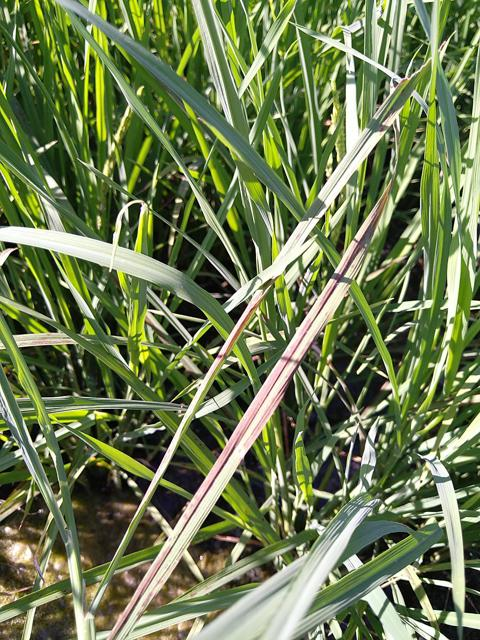

In [4]:
from IPython.display import Image
import matplotlib.image as mpimg

random_index_img = random.randint(0, 3024)
print("Image Shape: ", mpimg.imread(images_path[random_index_img]).shape)
print(images_path[random_index_img])
Image(images_path[random_index_img])

# Get Dataset From Directory

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2,
                             rotation_range = 90,
                             brightness_range = [0.5, 1.0],
                             zoom_range = [0.5, 1.0])

train_data = datagen.flow_from_directory(train_path,
                                        target_size = (224, 224),
                                        subset = "training",
                                        shuffle = True)

val_data = datagen.flow_from_directory(train_path,
                                      target_size = (224, 224),
                                      subset = 'validation',
                                      shuffle = False)

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime

logdir = "../Logs/potato/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

early_stopping = EarlyStopping(monitor = "val_accuracy",
                               patience = 10,
                               restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                              mode = 'max',
                              factor = 0.2,
                              patience = 2,
                              min_lr=1e-5)

tensorboard = TensorBoard(logdir)

# Creating a MobileNet Architecture Model

In [19]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras import Model
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Checkpoint/palm/palm-mobilenetv3small-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + ".ckpt"

base_model = MobileNetV3Small(input_shape = (224, 224, 3),
                              minimalistic = True,
                              include_top = False)
for layer in base_model.layers:
  layer.trainable = True

input = Input(shape = (224, 224, 3))
prep_input = preprocess_input(input)
x = base_model(prep_input)
x = Flatten()(x)
output = Dense(10, activation = "softmax")(x)

model = Model(inputs = input, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        441000    
 l)                                                              
                                                                 
 flatten_4 (Flatten)         (None, 28224)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                282250    
                                                                 
Total params: 723,250
Trainable params: 711,138
Non-trainable params: 12,112
_________________________________________________________________


# Creating a EfficientNet Architecture Model

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input, EfficientNetV2M
from tensorflow.keras import Model
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Checkpoint/palm/palm-efficientnetv2m-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + ".ckpt"

base_model = EfficientNetV2M(input_shape = (224, 224, 3),
                             include_top = False)
for layer in base_model.layers:
  layer.trainable = True

input = Input(shape = (224, 224, 3))
prep_input = preprocess_input(input)
x = base_model(prep_input)
x = Flatten()(x)
output = Dense(10, activation = "softmax")(x)

model = Model(inputs = input, outputs=output)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 6)                 376326    
                                                                 
Total params: 53526714 (204.19 MB)
Trainable params: 376326 (1.44 MB)
Non-trainable params: 53150388 (202.75 MB)
_________________________________________________________________


# Creating a ResNet Architecture Model

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications.resnet_v2 import preprocess_input, ResNet50V2
from tensorflow.keras import Model
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Checkpoint/palm/palm-resnetnet50v2m-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + ".ckpt"

base_model = ResNet50V2(input_shape = (224, 224, 3),
                        
                             include_top = False)
for layer in base_model.layers:
  layer.trainable = True

input = Input(shape = (224, 224, 3))
prep_input = preprocess_input(input)
x = base_model(prep_input)
x = Flatten()(x)
output = Dense(10, activation = "softmax")(x)

model = Model(inputs = input, outputs=output)
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_16 (Flatten)        (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 6)                 602

# Compile the Model

In [20]:
model.compile(loss ="categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [21]:
history = model.fit(train_data,
                    validation_data = val_data,
                    epochs = 100,
                    steps_per_epoch = len(train_data),
                    validation_steps = len(val_data),
                    callbacks = [early_stopping, reduce_lr, tensorboard])

model.save_weights(checkpoint_path)

Epoch 1/100
261/261 [==============================] - 394s 2s/step - loss: 1.7412 - accuracy: 0.4948 - val_loss: 8.0372 - val_accuracy: 0.3110 - lr: 0.0010
Epoch 2/100
261/261 [==============================] - 408s 2s/step - loss: 0.9343 - accuracy: 0.6792 - val_loss: 9.7693 - val_accuracy: 0.3298 - lr: 0.0010
Epoch 3/100
261/261 [==============================] - 397s 2s/step - loss: 0.7698 - accuracy: 0.7454 - val_loss: 5.2257 - val_accuracy: 0.3775 - lr: 0.0010
Epoch 4/100
261/261 [==============================] - 399s 2s/step - loss: 0.6547 - accuracy: 0.7862 - val_loss: 2.3137 - val_accuracy: 0.5768 - lr: 0.0010
Epoch 5/100
261/261 [==============================] - 396s 2s/step - loss: 0.5797 - accuracy: 0.8101 - val_loss: 2.5030 - val_accuracy: 0.5623 - lr: 0.0010
Epoch 6/100
261/261 [==============================] - 431s 2s/step - loss: 0.5090 - accuracy: 0.8300 - val_loss: 3.1025 - val_accuracy: 0.4998 - lr: 0.0010
Epoch 7/100
261/261 [==============================] - 406

In [22]:
model.evaluate(val_data)

65/65 [==============================] - 36s 555ms/step - loss: 0.2336 - accuracy: 0.9364


[0.23363226652145386, 0.9364467859268188]

# View the Training Graph

In [25]:
%load_ext tensorboard
%tensorboard --logdir "C:\Users\salma\pyworkspace\Logs\paddy" --port=8008

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Load Checkpoint

In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/Checkpoint/palm/palm-mobilenetv3small-20230923-091357.ckpt")
model.evaluate(val_data)

19/19 [==============================] - 149s 8s/step - loss: 1.6608 - accuracy: 0.3272


[1.6607835292816162, 0.32724252343177795]

# Evaluate

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)
	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')
	else:
		print('Confusion Matrix, Without Normalization')
	print(cm)
	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

In [ ]:
y_pred = np.array([])
y_val =  np.array([])
for x, y in val_data:
  y_pred = np.concatenate([y_pred, np.argmax(model.predict(x), axis = -1)])
  y_val = np.concatenate([y_val, np.argmax(y, axis=-1)])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm = cm, classes = classname)

NameError: ignored

## Classification Report

In [ ]:
classification_report(y_val, y_pred)